# Assignment 3 - AI tools

- Student 1 - Luca Modica
- Student 2 - Hugo Manuel Alves Henriques E Silva

---

## Import libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from icecream import ic

sns.set_style('darkgrid')
%matplotlib inline

## Reading data

In [174]:
import os

def read_csv_files(directory):
    csv_files = [file for file in os.listdir(directory) if file.endswith('_labeled.csv')]
    data = {}

    for file in csv_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        key = file.replace('_labeled.csv', '')
        data[key] = df

    return [file.replace('_labeled.csv', '') for file in csv_files], data

In [175]:
# with this method we will return an object
# with as property name the city and as
# property value the related dataframe
cities_names, dfs = read_csv_files('./')

print(f'Data from the following cities: {", ".join(cities_names)}.')

Data from the following cities: Shenyang, Guangzhou, Shanghai, Chengdu, Beijing.


In [176]:
city = 'Beijing'
print(f'Data from {city}: ')
dfs[city].head()

Data from Beijing: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,4,-8.0,79.0,1026.0,-5.0,23.69,0.0,0,0,1,1.0
1,4,-11.0,85.0,1021.0,-9.0,105.93,1.1,0,0,1,0.0
2,4,-21.0,43.0,1030.0,-11.0,117.55,0.0,0,1,0,0.0
3,4,-25.0,33.0,1034.0,-12.0,39.35,0.0,1,0,0,0.0
4,4,-24.0,30.0,1034.0,-10.0,59.00,0.0,1,0,0,0.0


In [177]:
city = 'Chengdu'
print(f'Data from {city}: ')
dfs[city].head()

Data from Chengdu: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,2,20.0,88.45,1007.1,22.0,1.0,0.0,0,0,0,1.0
1,2,17.0,54.39,1008.1,27.0,5.0,0.0,0,0,0,0.0
2,2,20.0,78.39,1008.1,24.0,2.0,0.0,0,0,0,0.0
3,2,19.0,65.41,1006.1,26.0,2.0,0.0,0,0,0,0.0
4,2,20.0,61.90,1003.1,28.0,2.0,0.0,0,0,0,0.0


In [178]:
city = 'Guangzhou'
print(f'Data from {city}: ')
dfs[city].head()

Data from Guangzhou: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,3.0,15.2,62.0,1013.9,22.9,7.3,0.0,1,0,0,0.0
1,3.0,10.7,43.0,1013.7,24.0,5.2,0.0,1,0,0,0.0
2,3.0,8.8,42.0,1014.4,22.3,9.2,0.0,1,0,0,0.0
3,3.0,12.1,51.0,1013.2,22.7,9.5,0.0,1,0,0,0.0
4,3.0,15.3,76.0,1011.5,19.6,3.0,0.0,0,1,0,0.0


In [179]:
city = 'Shanghai'
print(f'Data from {city}: ')
dfs[city].head()

Data from Shanghai: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,4,3.0,57.77,1030.1,11.0,66.0,0.0,1,0,0,0.0
1,4,-2.0,49.22,1032.9,8.0,194.0,0.0,1,0,0,0.0
2,4,-1.0,49.51,1029.1,9.0,2.0,0.0,1,0,0,0.0
3,4,-4.0,42.40,1029.1,8.0,7.0,0.0,1,0,0,0.0
4,4,-4.0,45.40,1028.1,7.0,2.0,0.0,0,1,0,0.0


In [180]:
city = 'Shenyang'
print(f'Data from {city}: ')
dfs[city].head()

Data from Shenyang: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,1,-3.0,26.98,1010.0,16.0,31.0,0.0,0,0,0,0.0
1,1,6.0,58.54,1008.0,14.0,51.0,0.0,0,0,0,0.0
2,1,0.0,43.60,1006.0,12.0,7.0,0.0,0,1,0,0.0
3,1,2.0,41.43,1011.0,15.0,23.0,0.0,0,1,0,0.0
4,1,-5.0,18.06,1013.0,20.0,28.0,0.0,0,0,1,0.0


## Model implementation

The Python class below will implement the KMeans algorithm.

In [181]:
import warnings
from sklearn.metrics import normalized_mutual_info_score
from sklearn.base import BaseEstimator, ClusterMixin, check_array

class KMeans(BaseEstimator, ClusterMixin):
    
    def __init__(self, 
        n_centers=5, 
        max_iter=100, 
        init_centroids='random', 
        random_seed=None, 
        distance_metric="euclidian", 
        iter_tol_centroids=1, 
        iter_tol_labels=1
        ):
        self.n_centers = n_centers
        self.max_iter = max_iter
        self.init_centroids = init_centroids
        self.random_seed = int(random_seed) if random_seed is not None else None
        self.iter_tol_centroids = iter_tol_centroids
        self.iter_tol_labels = iter_tol_labels
        self.distance_metric = distance_metric
        

    # ***private methods***
    def _set_distance_func(self, distance_metric):
        if distance_metric == "euclidian":
            self.distance_func_ = euclidean_distance
        elif distance_metric == "manhattan":
            self.distance_func_ = manhattan_distance
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")

    def _initialize_centroids(self, X):
        if self.init_centroids == 'random':
            if len(X) < self.n_centers:
                warnings.warn(
                    "Number of samples in X is less than the number of centers. \
                        The number of clusters has changed to number of datapoints.", UserWarning)
                self.n_centers = len(X)
            
            indices = self.rng_.choice(len(X), self.n_centers, replace=False)
            self.centroids_ = X[indices]
        elif self.init_centroids == 'kmeans++':
            first_centroid = self.rng_.integers(0, int(X.shape[0]))
            self._calculate_kmeans_plus_plus_centroids(first_centroid, X)
        else:
            raise ValueError(f"Unknown centroid initialization method: {self.init_centroids}")

    def _calculate_kmeans_plus_plus_centroids(self, first_centroid, X):
        self.centroids_ = np.zeros((self.n_centers, X.shape[1]))
        self.centroids_[0] = X[first_centroid]
        for i in range(1, self.n_centers):
            distances = np.array([np.min([self.distance_func_(X[j], self.centroids_[k]) for k in range(i)]) for j in range(X.shape[0])])
            self.centroids_[i] = X[np.argmax(distances)]


    # ***public methods***
    def fit(self, X, y=None, **kwargs):
        X = check_array(X)
        n_iter = 0

        self.rng_ = np.random.default_rng(self.random_seed)
        self._set_distance_func(self.distance_metric)
        self._initialize_centroids(X)
        self.n_features_in_ = X.shape[1]
            
        while n_iter < self.max_iter:
            # calculate distance from each point to each centroid
            distances = np.zeros((X.shape[0], self.n_centers))

            for i in range(self.n_centers):
                for j in range(X.shape[0]):
                    distances[j, i] = self.distance_func_(X[j], self.centroids_[i])

            # assign each point to the closest centroid
            self.labels_ = np.argmin(distances, axis=1)

            # calculate new centroids
            new_centroids = np.zeros((self.n_centers, X.shape[1]))
            for i in range(self.n_centers):
                cluster_points = X[self.labels_ == i]
                if cluster_points.size > 0:
                    new_centroids[i] = np.mean(cluster_points, axis=0)
                else:
                    # Handle the empty cluster case
                    new_centroids[i] = self.rng_.random(X.shape[1])

            # if centroids have not changed, stop
            if np.allclose(self.centroids_, new_centroids):
                break

            # otherwise, update centroids and continue
            self.centroids_ = new_centroids
            n_iter += 1

        self.n_iter_ = n_iter
        return self

    def predict(self, X):
        
        X = check_array(X, accept_sparse=True)

        pred_labels = np.zeros(X.shape[0], dtype=np.dtype("int64"))
        distances = np.zeros((X.shape[0], self.n_centers))

        for i in range(self.n_centers):
            for j in range(X.shape[0]):
                distances[j, i] = self.distance_func_(X[j], self.centroids_[i])

        pred_labels = np.argmin(distances, axis=1)

        return pred_labels


    def score(self, X, y=None, score_metric='inertia'):
        
        if score_metric == 'inertia':
            return inertia_score(X, self.centroids_, self.labels_)
        elif score_metric == 'silhouette':
            return silhouette_score(X, self.labels_, self.n_centers)
        elif score_metric == 'nmi':
            return nmi_score(X, y, self.labels_)
        else:
            raise ValueError(f"Unknown score metrix: {score_metric}")

# distance functions
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))


# scoring functions
def inertia_score(X, centroids, labels):
    """Inertia measures the sum of squared distances between each sample and its 
    closest centroid. A lower inertia indicates better clustering."""
    return np.sum((X - centroids[labels]) ** 2)

def silhouette_score(X, labels, n_centers):
    """Silhouette score measures how similar an object is to its own cluster 
    (cohesion) compared to other clusters (separation). The silhouette ranges 
    from -1 to 1, where a high value indicates that the object is well matched 
    to its own cluster and poorly matched to neighboring clusters."""

    silhouette_scores = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        #get label of the current point
        label = labels[i]
        intra_distances = [euclidean_distance(X[i], X[j]) for j in range(X.shape[0]) if labels[j] == label and i != j]
        average_intra_cluster_distance = np.mean(intra_distances) if intra_distances else 0
        
        #distance to points in other clusters
        min_distance_other_clusters = np.min([np.mean([euclidean_distance(X[i], X[j]) for j in range(X.shape[0]) if labels[j] == k]) for k in range(n_centers) if k != label])

        if average_intra_cluster_distance or min_distance_other_clusters:
            silhouette_scores[i] = (min_distance_other_clusters - average_intra_cluster_distance) / max(min_distance_other_clusters, average_intra_cluster_distance)
        else:
            silhouette_scores[i] = 0

    return np.mean(silhouette_scores)


def nmi_score(X, y, labels):
    """Normalized Mutual Information between the true labels and the predicted clusters 
    divided by the average entropy of the true labels and the predicted clusters"""
    if y is None:
        raise ValueError(f"To compute the NMI score, true labels cannot be None.")

    return normalized_mutual_info_score(y, labels)

## Sanity check

In [182]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(KMeans(random_seed=0))

We can generate syntetic data and make sure that everything works

Function to train and then visualize a 2D dataset. It will return the trained k-means model.

In [183]:
from sklearn.datasets import make_blobs

def k_means_visualization(k, X, title, init_centroids='random'):
    # k-means training
    kmeans = KMeans(n_centers=k, max_iter=100, init_centroids=init_centroids)
    kmeans.fit(X)

    # Visualize the K-Means clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette='viridis')
    plt.scatter(kmeans.centroids_[:,0], kmeans.centroids_[:,1], marker="X", c="r", s=80, label="centroids")
    plt.title(title)
    plt.grid(True)
    plt.legend(title='Cluster')\

    # highlight clusters' centroids
    plt.scatter(kmeans.centroids_[:,0], kmeans.centroids_[:,1], marker="X", c="r", s=80, label="centroids")
    
    plt.show()
    return kmeans

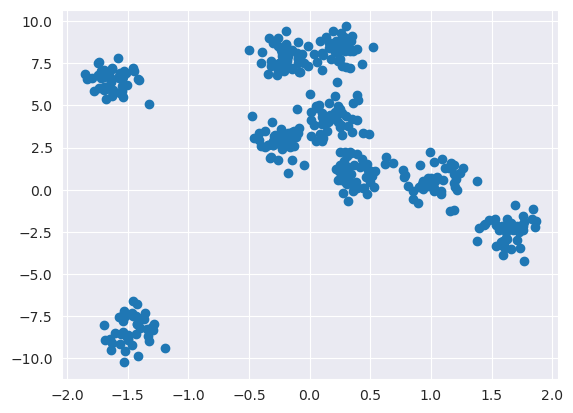

In [184]:
from sklearn.preprocessing import StandardScaler

# generate 2D data set
X, y = make_blobs(n_samples=400, centers=9, cluster_std=0.7, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# plot the data set
plt.scatter(X_scaled[:,0], X[:,1])

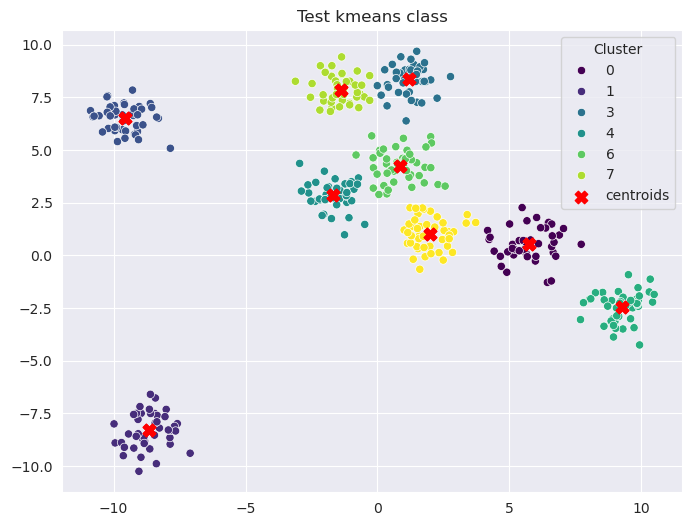

Inertia score: 376.0274968369567
Silhouette score: 0.6610770878561075
NMI score: 0.9764554372025217


In [185]:
kmeans = k_means_visualization(k=9, X=X, init_centroids='kmeans++', title="Test kmeans class")
print(f'Inertia score: {kmeans.score(X)}')
print(f'Silhouette score: {kmeans.score(X, score_metric="silhouette")}')
print(f'NMI score: {kmeans.score(X, y, score_metric="nmi")}')

In [186]:
print(f"kmeans centroids coordinates: \n {kmeans.centroids_}")
print(f"kmeans labels for each datapoint: \n {kmeans.labels_}")

kmeans centroids coordinates: 
 [[ 5.75471525  0.53847665]
 [-8.66039437 -8.28764594]
 [-9.57223945  6.49612937]
 [ 1.1957178   8.34658828]
 [-1.67261868  2.84061333]
 [ 9.26591028 -2.4444466 ]
 [ 0.84124654  4.26015311]
 [-1.38679137  7.83693901]
 [ 1.97738015  1.01475422]]
kmeans labels for each datapoint: 
 [2 0 1 4 0 3 7 0 5 5 4 7 6 8 5 2 0 6 7 6 0 8 3 6 3 8 4 0 4 0 4 8 3 0 3 6 8
 7 4 1 5 2 0 1 1 1 7 0 8 6 0 4 8 3 6 4 5 5 0 7 0 3 7 7 7 5 8 4 0 7 5 6 6 7
 6 8 3 3 8 1 1 7 2 1 0 3 4 5 3 7 6 1 1 8 7 8 3 4 4 8 3 5 3 0 5 6 5 0 0 6 4
 1 3 2 1 3 8 8 5 8 6 7 2 3 3 2 3 8 0 4 5 7 7 2 2 0 7 7 2 8 2 3 2 0 6 3 2 6
 3 2 6 1 3 2 0 5 6 0 4 3 5 4 5 8 1 2 7 4 3 3 0 6 1 2 0 0 1 1 5 7 4 5 2 1 1
 7 1 7 2 5 0 8 0 6 1 6 3 2 6 1 5 7 0 6 8 0 2 6 6 2 0 4 1 1 7 5 8 6 3 4 7 1
 6 2 1 8 2 5 6 8 7 7 2 4 8 3 4 2 4 6 1 3 1 2 7 2 6 3 6 5 6 8 2 2 4 0 6 0 8
 5 1 6 4 5 7 6 0 8 5 2 6 5 0 0 1 8 6 8 8 4 4 4 6 1 3 4 3 4 4 5 7 2 7 5 1 2
 1 5 6 4 3 8 5 0 8 4 0 6 7 4 8 0 1 1 8 1 7 6 6 2 2 7 4 8 2 8 5 6 7 2 3 5 7
 3 8 3 3 1 3 

Clustering validation:

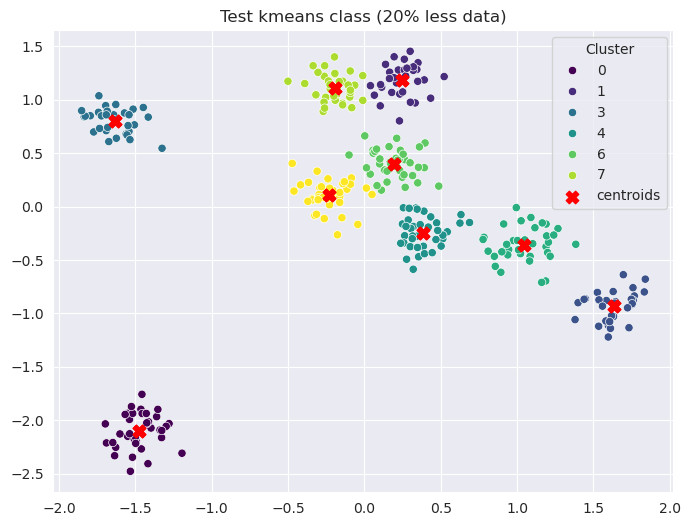

KMeans(init_centroids='kmeans++', n_centers=9)

In [187]:
from sklearn.model_selection import train_test_split

# removing 20% of the dat points randomly
X_filtered, _, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# visualization
k_means_visualization(k=9, X=X_filtered, init_centroids='kmeans++', title="Test kmeans class (20% less data)")

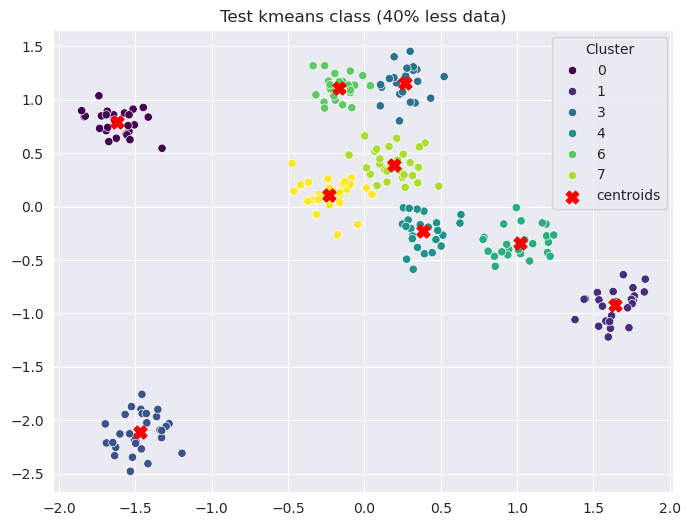

KMeans(init_centroids='kmeans++', n_centers=9)

In [188]:
# removing 40% of the dat points randomly
X_filtered, _, _, _ = train_test_split(X_scaled, y, test_size=0.4, random_state=42)


# visualization
k_means_visualization(k=9, X=X_filtered, init_centroids='kmeans++', title="Test kmeans class (40% less data)")

## Evaluation

Beijing and Shenyang will be the train and validation set: we can do training on a city and then validate it, and viceversa. Then, Guangzhou and Shanghai are 2 test sets.

In [189]:
train_data = pd.concat([dfs['Beijing'], dfs['Shenyang']])
X = train_data.drop('PM_HIGH', axis=1)
y = train_data['PM_HIGH']

X.head()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE
0,4,-8.0,79.0,1026.0,-5.0,23.69,0.0,0,0,1
1,4,-11.0,85.0,1021.0,-9.0,105.93,1.1,0,0,1
2,4,-21.0,43.0,1030.0,-11.0,117.55,0.0,0,1,0
3,4,-25.0,33.0,1034.0,-12.0,39.35,0.0,1,0,0
4,4,-24.0,30.0,1034.0,-10.0,59.00,0.0,1,0,0


In [190]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [191]:
kmeans = KMeans(n_centers=2, max_iter=100, init_centroids='kmeans++')
kmeans.fit(X_train_scaled)

y_pred_val = kmeans.predict(X_test_scaled)
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       412
         1.0       1.00      0.01      0.01       167

    accuracy                           0.71       579
   macro avg       0.86      0.50      0.42       579
weighted avg       0.80      0.71      0.60       579



In [192]:
print(f'Inertia score: {kmeans.score(X_train_scaled)}')
print(f'Silhouette score: {kmeans.score(X_train_scaled, score_metric="silhouette")}')
print(f'NMI score: {kmeans.score(X_train_scaled, y_train, score_metric="nmi")}')

Inertia score: 21643.510251116346
Silhouette score: 0.8216596636017605
NMI score: 0.001381417328092066


In [193]:
X_guangzhou = dfs['Guangzhou']
X_guangzhou = X_guangzhou.drop('PM_HIGH', axis=1)
X_guangzhou_scaled = scaler.transform(X_guangzhou)
y_guangzhou = dfs['Guangzhou']['PM_HIGH']
y_pred_guangzhou = kmeans.predict(X_guangzhou_scaled)
print(classification_report(y_guangzhou, y_pred_guangzhou))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1266
         1.0       0.10      0.02      0.04        86

    accuracy                           0.92      1352
   macro avg       0.52      0.50      0.50      1352
weighted avg       0.88      0.92      0.90      1352



In [194]:
X_shanghai = dfs['Shanghai']
X_shanghai = X_shanghai.drop('PM_HIGH', axis=1)
X_shanghai_scaled = scaler.transform(X_shanghai)
y_shanghai = dfs['Shanghai']['PM_HIGH']
y_pred_shanghai = kmeans.predict(X_shanghai_scaled)
print(classification_report(y_shanghai, y_pred_shanghai))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1218
         1.0       0.00      0.00      0.00       133

    accuracy                           0.89      1351
   macro avg       0.45      0.50      0.47      1351
weighted avg       0.81      0.89      0.85      1351



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f644362c-fd24-40b7-80b6-2294a0d51cba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>